Task-1: please do a proper analysis of the whole data, plot all relevant plots, note down all observations

Task 2: Sample (S) 100 transactions from whole data (D), for every transaction in S, print 10 transactions from D which have least values of 'similarity'

the similarity between any two vectors is defined as
similarity(vi,vj) = cosine^-1(dot product (vi, vj) / (length(vi) * length(vj)) )

1. vi represents a vector i.e. a row in your data.
2. similarity(i,j) is just a function you can think it like f(x,y)
3. length(vi): length of the vector vi
4. dot product(i,j) is the dot product between the vectors vi, vj [for more about the dot product please check the linear algebra videos.]





## Task -1 : Performing EDA(Exploratory Data Analysis on credit card data)

### About the data:

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

**Feature 'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. 

The **Feature 'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

**Feature 'Class'** is the response variable and it takes value 1 in case of fraud and 0 otherwise.



EDA is performed only on Time and Amount Feature.

In [1]:
#importing pandas module
import pandas as pd

In [2]:
credit_card_data = pd.read_csv("creditcard.csv")

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#finding the shape of dataframe (finding no.of observations and features in the given dataframe)
credit_card_data.shape

(284807, 31)

284807 observations and 31 features  , 30 features by excluding 1 class feature 

In [5]:
#finding whether it is balanced data or imbalanced data
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

From the above info it is clear that it is an imbalanced dataset

Renaming the class variables 

0 - legitimate

1- fraud

In [6]:
credit_card_data['Class'] = credit_card_data['Class'].apply(lambda x:'legitimate' if x == 0 else 'fraud')

In [7]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,legitimate
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,legitimate
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,legitimate
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,legitimate
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,legitimate


In [8]:
#subsetting the dataset (selecting only required columns which are useful for analysis)
credit_card_data_subset = credit_card_data[['Time','Amount','Class']]

In [9]:
#checking the distribution of data (to check whether our subset of data contains same count as original dataset)
credit_card_data_subset['Class'].value_counts()

legitimate    284315
fraud            492
Name: Class, dtype: int64

Performing EDA on this data (Pair plots to find out which features have more importance when compared to other features)


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [ ]:
#sns.pairplot(data = credit_card_data,hue='Class',kind='scatter')

C:\Users\nvima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nvima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

Text(0.5, 1.0, "Histogram with PDF for feature 'time' ")

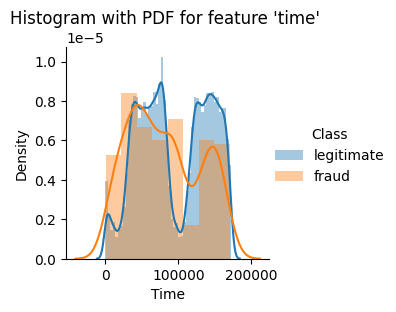

In [13]:
sns.FacetGrid(credit_card_data_subset,hue='Class').map(sns.distplot,'Time').add_legend()
plt.title("Histogram with PDF for feature 'time' ")

C:\Users\nvima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\nvima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

Text(0.5, 1.0, "Histogram with PDF for feature 'Amount' ")

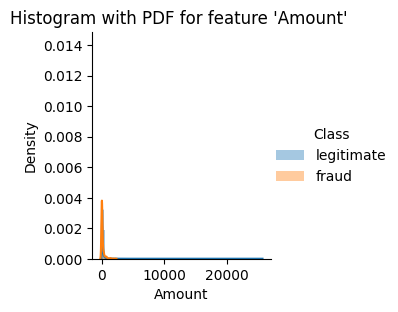

In [15]:
 sns.FacetGrid(credit_card_data_subset,hue='Class').map(sns.distplot,'Amount').add_legend()
plt.title("Histogram with PDF for feature 'Amount' ")

**Observation:**

1.It is evident that the feature 'time' has so much of overlapping. We couldn't make any predictions or classifications out of it. So, we could discard this feature in classification of outcome.

2.Whereas the feature 'Amount' has also overlapping but we could make some prediction out of it when compared to another feature. 
    

    

In [16]:
#dividing the data according to classes for appropriate analysis
credit_card_data_subset_class_fraud = credit_card_data_subset[credit_card_data_subset['Class'] == 'fraud']

In [17]:
credit_card_data_subset_class_fraud.shape

(492, 3)

In [18]:
credit_card_data_subset_class_fraud.head()

,Time,Amount,Class
541,406.0,0.00,fraud
623,472.0,529.00,fraud
4920,4462.0,239.93,fraud
6108,6986.0,59.00,fraud
6329,7519.0,1.00,fraud


In [19]:
credit_card_data_subset_class_legitimate = credit_card_data_subset[credit_card_data_subset['Class'] == 'legitimate']

In [20]:
credit_card_data_subset_class_legitimate.shape

(284315, 3)

In [21]:
credit_card_data_subset_class_legitimate.head()

,Time,Amount,Class
0,0.0,149.62,legitimate
1,0.0,2.69,legitimate
2,1.0,378.66,legitimate
3,1.0,123.50,legitimate
4,2.0,69.99,legitimate


### Univariate Analysis on feature 'Amount'

Plotting **CDF(Cumulative Distributive Function)** and **PDF(Probability Density Function)** to analyze more about the data

In [22]:
import numpy as np


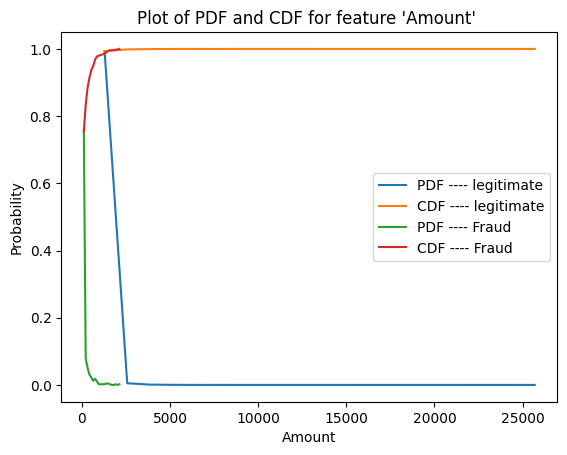

In [23]:
count,bin_edges = np.histogram(credit_card_data_subset_class_legitimate['Amount'],bins = 20,density = True)
PDF = count/sum(count)
#print("PDF : ",PDF)
#print("\nbin edges : " , bin_edges)
#computing CDF with help of PDF 
CDF = np.cumsum(PDF)
#plotting PDF,CDF
plt.plot(bin_edges[1:],PDF,label = "PDF ---- legitimate")
plt.plot(bin_edges[1:],CDF,label = "CDF ---- legitimate")

count,bin_edges = np.histogram(credit_card_data_subset_class_fraud['Amount'],bins = 20,density = True)
PDF = count/sum(count)
#computing CDF with help of PDF 
CDF = np.cumsum(PDF)
#plotting PDF,CDF
plt.plot(bin_edges[1:],PDF,label = "PDF ---- Fraud")
plt.plot(bin_edges[1:],CDF,label = "CDF ---- Fraud")

plt.xlabel("Amount")
plt.ylabel("Probability")
plt.title("Plot of PDF and CDF for feature 'Amount' ")
plt.legend()



**Observation and Conclusion **

1.From the above plot we can observe that there is slight overlap between CDF's of both classes

2.But , we can make an observation that more than **95% of fraud transactions** have **purchase Amount below 2500** approximately.

3.From that we can conclude that if the amount of purchase is below 2500 it is more likely to be a fraud transaction else can be classified as a legitimate 

### Box plot and whiskers

<AxesSubplot: xlabel='Class', ylabel='Amount'>

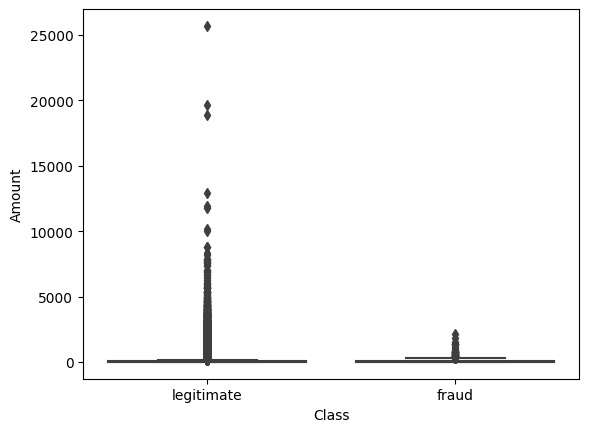

In [24]:
sns.boxplot(data = credit_card_data_subset,x='Class',y='Amount')

### Violin plot

<AxesSubplot: xlabel='Class', ylabel='Amount'>

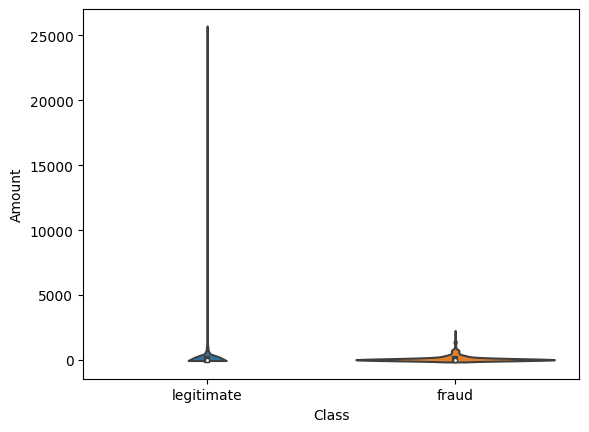

In [25]:

sns.violinplot(data= credit_card_data_subset,x='Class',y='Amount')

**Observation:**
    
These both plots(Box plots as well as Violin plots) are difficult to analyze when compared to PDF and CDF as the data is imbalanced,huge dataset and also scale is not so clear.

### Task-2 : Finding the least values of similarities 
Task 2: Sample (S) 100 transactions from whole data (D), for every transaction in S, print 10 transactions from D which have least values of 'similarity'



In [26]:
#creating a sample of 100 values from Data , 
#sample will not have 'Class' feature in it because for comparison we don't need 'Class' feature.
credit_card_data_sample = credit_card_data[credit_card_data.columns[:-1]].sample(100)

In [27]:
#indexes of all the samples (100 samples)
credit_card_data_sample.index

Int64Index([262015, 276205, 169993,  68247, 167120,  61893,  58655, 280839,
             22822, 282349,  62905, 252638, 231135,  69054, 115310,  94353,
            264294, 276580,  93527, 147643, 173904,  75382,  13697,  55535,
            224831, 133841, 218206,  75158,  42031,  72064, 141244, 235724,
            178391, 157150, 251634,  60800, 207139,  15383, 157612, 238040,
            228877, 144522,  26181, 215295,  10629,  98497, 241291, 257842,
            269652,  53153,   8361, 211895,  69643, 126779, 126812, 277956,
            167180,  42791,  91566,  82229, 241430,  99477, 283258, 276061,
              7544,  28497,  56348,  68937, 119175, 188097, 164731,  81749,
              2069,  28899, 148133, 245633, 248033,  29032, 214315,  25417,
            190109, 199800,  95454,  50651, 198161, 230316,  72179,  10517,
            245417, 219410, 140073,  91814, 129363,  69600,  51664, 224677,
            238827, 201778,  52760,   7191],
           dtype='int64')

In [28]:
credit_card_data_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
262015,160273.0,-5.292940,-6.802089,-2.516583,-0.437940,5.672498,-3.532384,0.697383,-0.984341,0.694762,...,-2.100017,-0.347143,1.774062,3.619143,0.240240,-0.239512,1.220548,0.382323,-0.086401,140.00
276205,166951.0,2.091528,-0.535594,-2.725095,-1.721781,2.271070,3.002565,-0.481316,0.719838,0.647906,...,-0.112348,-0.292109,-0.864858,0.399843,0.723169,-0.359430,0.561681,-0.083325,-0.073255,4.00
169993,119964.0,1.889381,0.152544,-2.329743,0.746245,1.017094,0.136850,-0.009957,0.127754,0.732289,...,-0.246490,0.063047,0.619468,0.030176,-1.259645,-0.015242,0.829746,0.015437,-0.024081,12.31
68247,52898.0,-0.587898,-2.668811,-0.750048,2.050192,-1.187155,-0.340678,1.374507,-0.291028,-0.198627,...,1.648620,0.575277,-0.342752,-0.931332,0.587922,0.416974,-0.386137,-0.173072,0.163450,919.67
167120,118494.0,-0.402933,-0.403530,0.043794,-3.318622,2.151746,3.711350,-0.629242,1.061655,-0.910806,...,0.100114,0.395305,0.959666,-0.241126,0.733460,0.021147,-0.162484,0.132814,0.128516,11.00


In [29]:
#removing class for credit_card_data also.
credit_card_data_without_label = credit_card_data[credit_card_data.columns[:-1]]

In [30]:
credit_card_data_without_label.shape

(284807, 30)

#### Create a function called similarity to check for the similarity and return least 10 transactions:


In [31]:
def similarity(sample, whole_data): 
    """Returns a dataframe of top 10 least values of similarity
    sample -- pass the one of the index of sample and
    whole_data -- entire dataframe , as we have to compare each row in dataframe with sample."""
    index_value = []
    Class = []
    similarity_list = []
    for i in whole_data.index:
        similarity_value = np.arccos(np.dot(credit_card_data_sample.loc[sample],credit_card_data_without_label.loc[i])/(np.linalg.norm(credit_card_data_sample.loc[sample])*np.linalg.norm(credit_card_data_without_label.loc[i])))
        similarity_list.append(similarity_value)
        Class.append(credit_card_data['Class'][i])
        index_value.append(i)
    similarity_df = pd.DataFrame({'index_value':index_value,'similarity_value':similarity_list,'Class':Class})
    print(f"sample index value is {sample} ")
    return similarity_df.sort_values('similarity_value').head(10)
    
    
#sort_values -- will sort the dataframe based on the column given in the function of sort_values

#np.dot -- built-in function of numpy, to calculate dot product between two vectors

# .loc[] --- is used to return a row based on the value provided in the arguments (passing the index in that arguments)

#linalg.norm -- calculates the magnitude of the vector
#The length of the vector is referred to as the vector norm or the vector’s magnitude.
#The length of a vector is a nonnegative number that describes the extent of the vector in space, 
#and is sometimes referred to as the vector’s magnitude or the norm.
    

In [32]:
#sample output

#providing input directly without calling the sample_index variable as it wouldn't
#work in the frontend

#similarity(index_from_sample_data,credit_card_data_without_label)

In [33]:
#commenting it as it is uploaded notebook , we couldn't give input in the kaggle frontend

#sample_index = int(input("Enter the one of the index value from your credit_card_data_sample : "))

In [34]:
#execute this only after you execute the above block 

#calling the function

#similarity(sample_index,credit_card_data_without_label)  

#credit_card_data_without_label -- is the whole dataframe without labels
#sample_index is the value (one of the index value) from the samples.

 